In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator.plot_resonator import amplitude
from kid_readout.analysis.timeseries import iqnoise

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-27_201756_sweep_stream_simultaneous/')

In [4]:
npd.node_names()

['SweepStreamArray0',
 'ADCSnap1',
 'SweepStreamArray2',
 'ADCSnap3',
 'SweepStreamArray4',
 'ADCSnap5',
 'SweepStreamArray6',
 'ADCSnap7',
 'SweepStreamArray8',
 'ADCSnap9',
 'SweepStreamArray10',
 'ADCSnap11',
 'SweepStreamArray12',
 'ADCSnap13',
 'SweepStreamArray14',
 'ADCSnap15',
 'SweepStreamArray16',
 'ADCSnap17',
 'SweepStreamArray18',
 'ADCSnap19']

In [5]:
all_ssa = [npd.read(name) for name in npd.node_names() if name.startswith('SweepStreamArray')]

In [6]:
low_ssa = all_ssa[:5]
high_ssa = all_ssa[5:]

In [7]:
all_snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [8]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(372.0, 373.0),
 (214.0, 209.0),
 (128.0, 130.0),
 (74.0, 75.0),
 (47.0, 51.0),
 (127.0, 132.0),
 (50.0, 50.0),
 (30.0, 32.0),
 (20.0, 20.0),
 (15.0, 15.0)]

In [9]:
for ssa in all_ssa:
    temperature.add_temperature(ssa, cryostat='hpd')

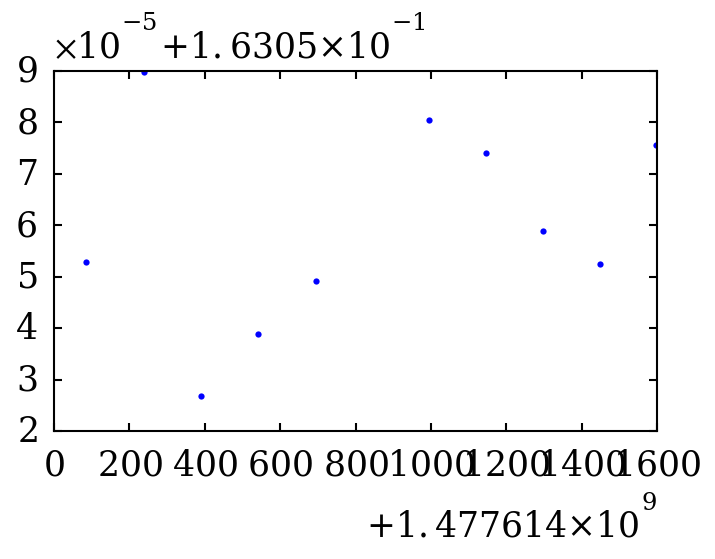

In [10]:
fig, ax = plt.subplots()
ax.plot([ssa.stream_array.epoch for ssa in all_ssa],
        [ssa.state.temperature.package for ssa in all_ssa],
        '.b')

df = pd.concat([sss.to_dataframe() for sss in all_sss])
np.save(npd.root_path.split('/')[-2] + '.npy', df.to_records())
df.shape

Qi: 83860; Qc: 20240
Qi: 96718; Qc: 19783
Qi: 96779; Qc: 19746
Qi: 96646; Qc: 19776
Qi: 96152; Qc: 19803


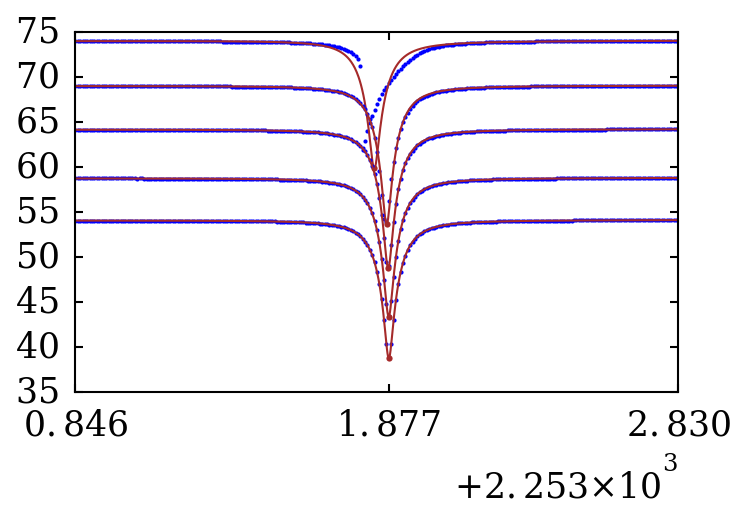

In [11]:
number = 0
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 18659; Qc: 38524
Qi: 82834; Qc: 9999491
Qi: 18532; Qc: 37774
Qi: 18528; Qc: 37799
Qi: 18587; Qc: 38039


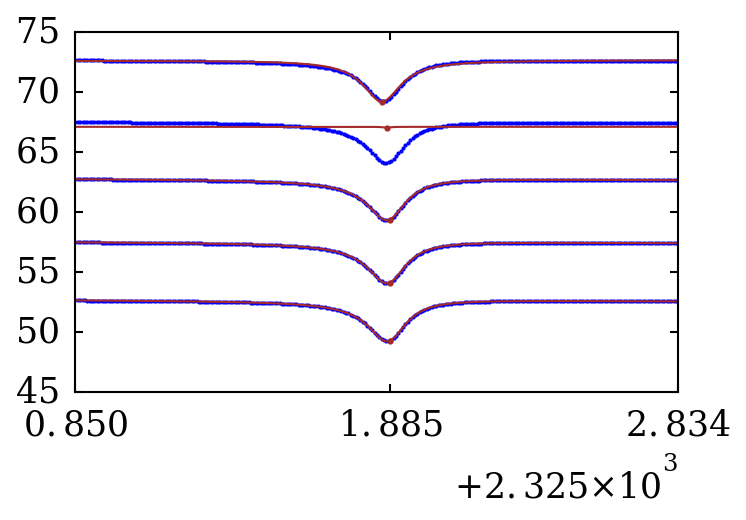

In [12]:
number = 1
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 31102; Qc: 3623
Qi: 60492; Qc: 3965
Qi: 61331; Qc: 4010
Qi: 24862; Qc: 3750
Qi: 61275; Qc: 3941


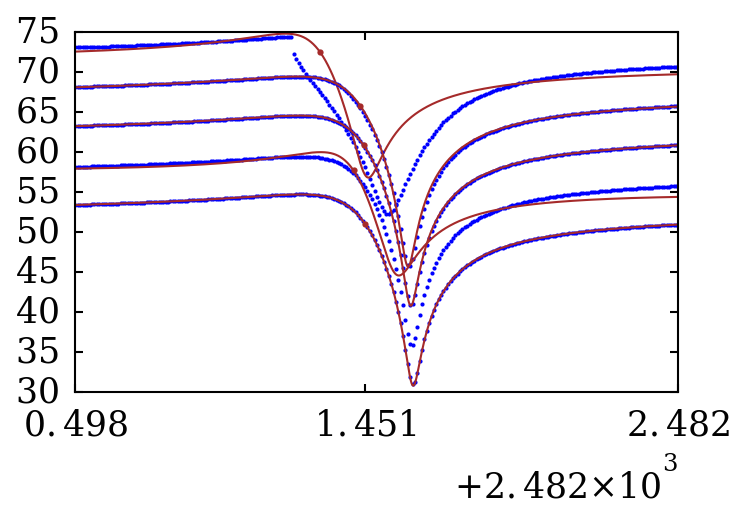

In [13]:
number = 2
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 134; Qc: 3094
Qi: 8445; Qc: 1873229
Qi: 2223; Qc: 1011943
Qi: 5987; Qc: 2461902
Qi: 16077; Qc: 8650548


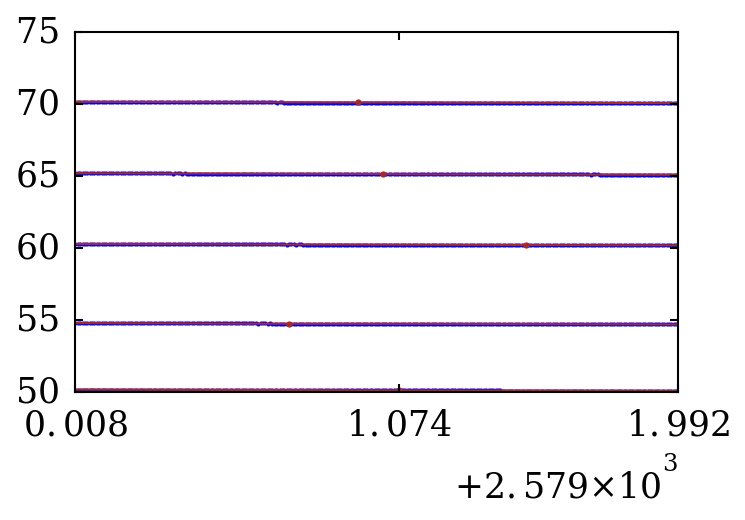

In [14]:
number = 3
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 67802; Qc: 230163
Qi: 102162; Qc: 196792
Qi: 125966; Qc: 189277
Qi: 126367; Qc: 189410
Qi: 124203; Qc: 188661


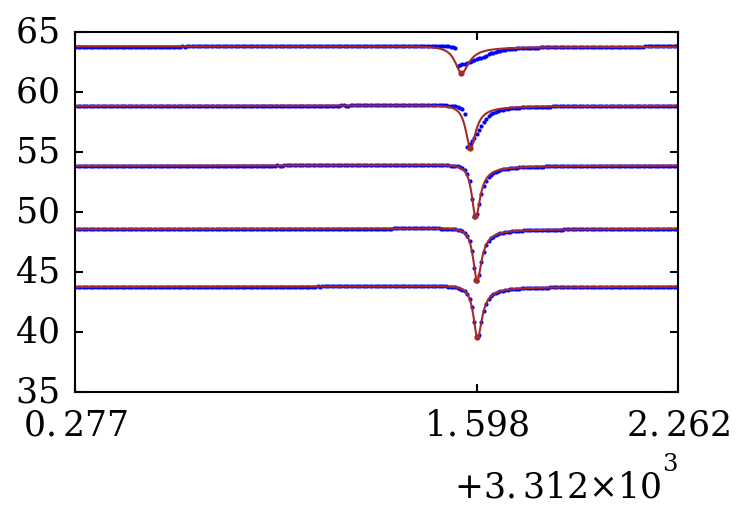

In [15]:
number = 0
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 59655; Qc: 62241
Qi: 142513; Qc: 50546
Qi: 175327; Qc: 49955
Qi: 175712; Qc: 50103
Qi: 172401; Qc: 50071


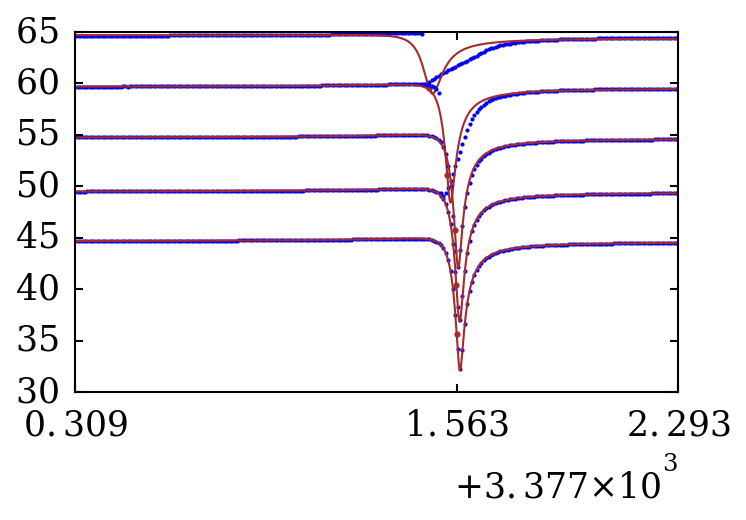

In [16]:
number = 1
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 56433; Qc: 33007
Qi: 112732; Qc: 28250
Qi: 117459; Qc: 28269
Qi: 116978; Qc: 28330
Qi: 115171; Qc: 28343


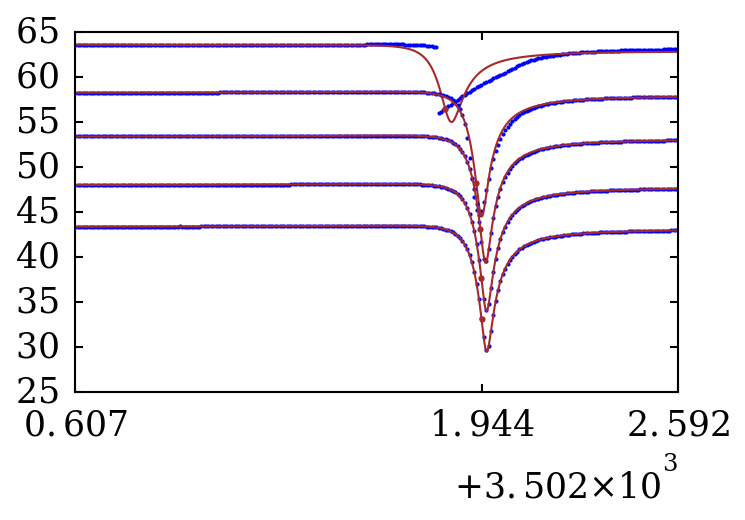

In [17]:
number = 2
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 56944; Qc: 30665
Qi: 99052; Qc: 28292
Qi: 100427; Qc: 28346
Qi: 99697; Qc: 28434
Qi: 98347; Qc: 28446


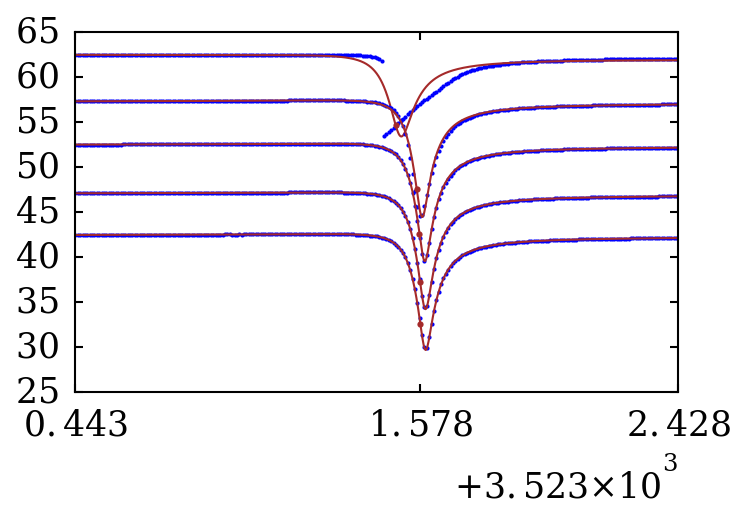

In [18]:
number = 3
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

In [19]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

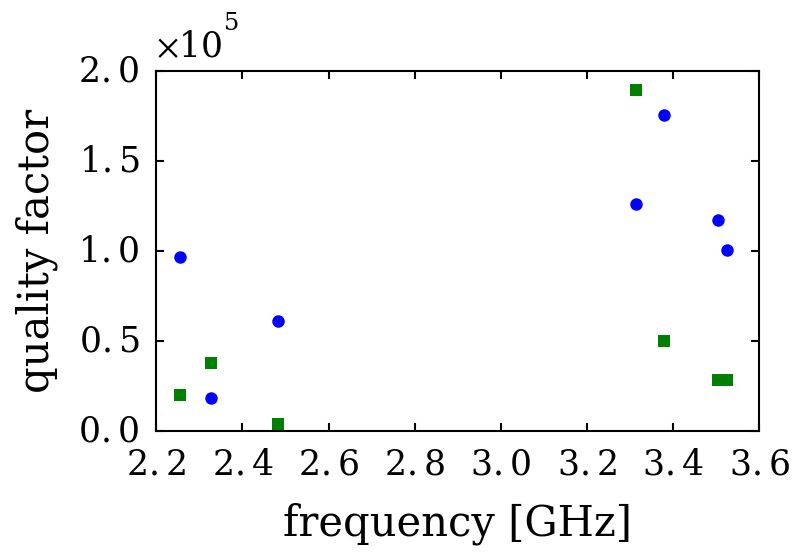

In [20]:
attenuation_index = 2
fig, ax = plt.subplots()
for lh_index, ssa in enumerate([low_ssa[attenuation_index], high_ssa[attenuation_index]]):
    for number in range(ssa.num_channels):
        if lh_index != 0 or number != 3:
            ax.plot(f_scale * ssa[number].resonator.f_0,
                    ssa[number].resonator.Q_i,
                    'o', color=Qi_color, label='$Q_i$')
            ax.plot(f_scale * ssa[number].resonator.f_0,
                    ssa[number].resonator.Q_e_real,
                    's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
#ax.legend(loc='upper center', numpoints=1)
#ax.set_xlim(1.9, 4.1)
#ax.set_ylim(0, 2e5)

In [21]:
colors = ['blue', 'green', 'red', 'gray', 'cyan', 'magenta', 'yellow', 'black']

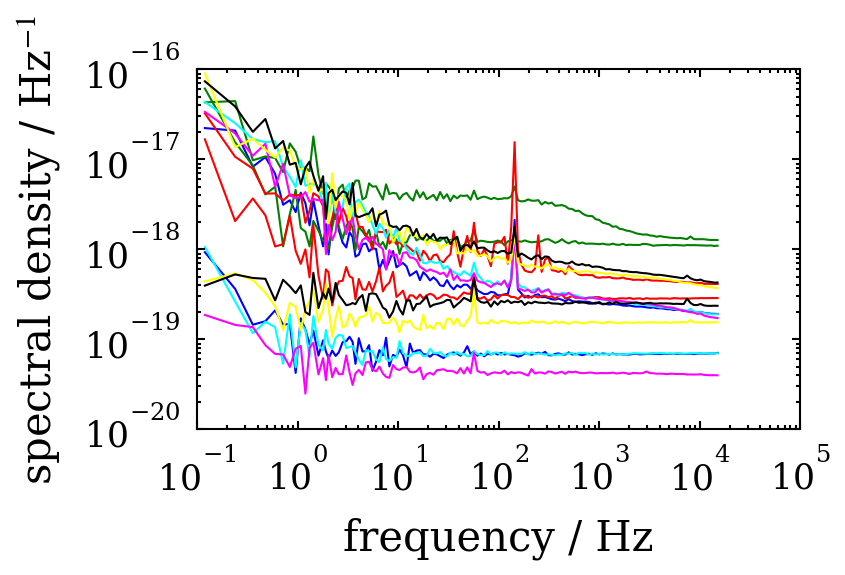

In [22]:
attenuation_index = 2

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')

for lh_index, ssa in enumerate([low_ssa[attenuation_index], high_ssa[attenuation_index]]):
    for number in range(ssa.num_channels):
        if lh_index != 0 or number != 3:
            ax.plot(ssa[number].S_frequency, ssa[number].S_xx,
                    color=colors[number + 4 * lh_index])
            ax.plot(ssa[number].S_frequency, ssa[number].S_yy,
                    color=colors[number + 4 * lh_index])